# Customer Behavior Analysis and Churn Prediction Using Synthetic Data

This project involves creating a synthetic dataset to simulate customer behavior and attributes for analysis, specifically targeting customer churn prediction. Here's an overview of the key components of the dataset and the project's focus:

## Dataset Components

1. Customer Demographics:
Represents static customer attributes.
Variables might include:

- Age: Numeric (e.g., 18-75 years).
- Gender: Categorical (e.g., Male, Female, Other).
- Income: Numeric (e.g., annual income in USD).

2. Purchase History:
Reflects customers' transactional behaviors.
Variables might include:

- Purchase Frequency: Numeric (e.g., number of purchases per month).
- Average Transaction Value: Numeric (e.g., average spend per transaction in USD).
- Total Purchases: Derived or raw numeric data showing lifetime or recent purchases.

3. Engagement Metrics:
Tracks customer interaction with the company's services.
Variables might include:

- App Usage Frequency: Numeric (e.g., logins per week).
- Last Engagement Date: Date field (e.g., date of last app use).
- Engagement Score: Numeric score aggregating various interactions.

4. Target Variable (Churn):
Churn: Binary variable where:
- 1 indicates a customer who has churned (stopped using the service).
- 0 indicates a customer who has been retained.

# Objectives 
1. Generate a synthetic dataset to mimic real-world customer data.
2. Preprocess the dataset for model readiness.
3. Train a classification model using scikit-learn.
4. Evaluate the model and present the results.
5. Interpretation of results 

## Objective 1: Generate a synthetic dataset to mimic real-world customer data.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Step 1: Generate Mock Data
np.random.seed(42)

# Number of samples
n_samples = 1000

# Generating synthetic customer data
data = {
    'CustomerID': np.arange(1, n_samples + 1),
    'Age': np.random.randint(18, 70, size=n_samples),
    'Gender': np.random.choice(['Male', 'Female'], size=n_samples),
    'Income': np.random.randint(20000, 120000, size=n_samples),
    'PurchaseFrequency': np.random.randint(1, 20, size=n_samples),
    'AvgTransactionValue': np.random.uniform(10, 500, size=n_samples),
    'AppUsageFrequency': np.random.randint(0, 30, size=n_samples),
    'DaysSinceLastEngagement': np.random.randint(0, 90, size=n_samples),
    'Churn': np.random.choice([0, 1], size=n_samples, p=[0.7, 0.3])  # 30% churn rate
}

# Convert to DataFrame
customer_data = pd.DataFrame(data)

customer_data.head()

,CustomerID,Age,Gender,Income,PurchaseFrequency,AvgTransactionValue,AppUsageFrequency,DaysSinceLastEngagement,Churn
0,1,56,Male,65648,15,426.670521,7,42,1
1,2,69,Male,29516,19,113.877087,18,12,0
2,3,46,Male,22396,7,332.103206,19,12,0
3,4,32,Female,104082,19,241.418084,14,59,0
4,5,60,Male,39129,19,441.276802,8,56,0


In [3]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               1000 non-null   int32  
 1   Age                      1000 non-null   int32  
 2   Gender                   1000 non-null   object 
 3   Income                   1000 non-null   int32  
 4   PurchaseFrequency        1000 non-null   int32  
 5   AvgTransactionValue      1000 non-null   float64
 6   AppUsageFrequency        1000 non-null   int32  
 7   DaysSinceLastEngagement  1000 non-null   int32  
 8   Churn                    1000 non-null   int32  
dtypes: float64(1), int32(7), object(1)
memory usage: 43.1+ KB


In [4]:
customer_data.describe()

,CustomerID,Age,Income,PurchaseFrequency,AvgTransactionValue,AppUsageFrequency,DaysSinceLastEngagement,Churn
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,43.81900,70336.159000,10.159000,253.660335,14.533000,45.390000,0.289000
std,288.819436,14.99103,28781.841939,5.530127,141.234007,8.475302,25.918713,0.453525
min,1.000000,18.00000,20163.000000,1.000000,10.005701,0.000000,0.000000,0.000000
25%,250.750000,31.00000,46361.750000,5.000000,131.106511,7.000000,23.000000,0.000000
50%,500.500000,44.00000,69191.500000,10.000000,254.126702,14.000000,45.500000,0.000000
75%,750.250000,56.00000,94708.000000,15.000000,376.697859,22.000000,68.000000,1.000000
max,1000.000000,69.00000,119986.000000,19.000000,499.783275,29.000000,89.000000,1.000000


## Objective 2: Preprocess the dataset for model readiness.

In [6]:
# Encode Gender
label_encoder = LabelEncoder()
customer_data['Gender'] = label_encoder.fit_transform(customer_data['Gender'])
customer_data.head()

,CustomerID,Age,Gender,Income,PurchaseFrequency,AvgTransactionValue,AppUsageFrequency,DaysSinceLastEngagement,Churn
0,1,56,1,65648,15,426.670521,7,42,1
1,2,69,1,29516,19,113.877087,18,12,0
2,3,46,1,22396,7,332.103206,19,12,0
3,4,32,0,104082,19,241.418084,14,59,0
4,5,60,1,39129,19,441.276802,8,56,0


In [9]:
# Scale numeric features
scaler = StandardScaler()
features_to_scale = ['Age', 'Income', 'PurchaseFrequency', 
                     'AvgTransactionValue', 'AppUsageFrequency', 'DaysSinceLastEngagement']

customer_data[features_to_scale] = scaler.fit_transform(customer_data[features_to_scale])

customer_data.head()

,CustomerID,Age,Gender,Income,PurchaseFrequency,AvgTransactionValue,AppUsageFrequency,DaysSinceLastEngagement,Churn
0,1,0.812959,1,-0.162968,0.875825,1.225603,-0.889263,-0.130859,1
1,2,1.680578,1,-1.418970,1.599497,-0.990223,0.409276,-1.288903,0
2,3,0.145560,1,-1.666472,-0.571520,0.555689,0.527325,-1.288903,0
3,4,-0.788799,0,1.173056,1.599497,-0.086724,-0.062920,0.525366,0
4,5,1.079919,1,-1.084808,1.599497,1.329073,-0.771214,0.409562,0


In [10]:
# Split the data into features and target
X = customer_data.drop(columns=['CustomerID', 'Churn'])
y = customer_data['Churn']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Objective 3: Train a classification model using scikit-learn.

In [11]:
# Using a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Objective 4: Evaluate the model and present the results.

In [ ]:
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True) # output_dict=True, function returns the report as a structured Python dictionary instead of a plain string
accuracy = accuracy_score(y_test, y_pred)

# Convert classification report to DataFrame
report_df = pd.DataFrame(report).transpose() # transpose method swaps rows and columns

# Format accuracy separately
accuracy_df = pd.DataFrame({'Metric': ['Accuracy'], 'Value': [accuracy]})

report_df, accuracy_df


(              precision    recall  f1-score  support
 0              0.722513  0.945205  0.818991  146.000
 1              0.111111  0.018519  0.031746   54.000
 accuracy       0.695000  0.695000  0.695000    0.695
 macro avg      0.416812  0.481862  0.425369  200.000
 weighted avg   0.557435  0.695000  0.606435  200.000,
      Metric  Value
 0  Accuracy  0.695)

In [23]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[138   8]
 [ 53   1]]


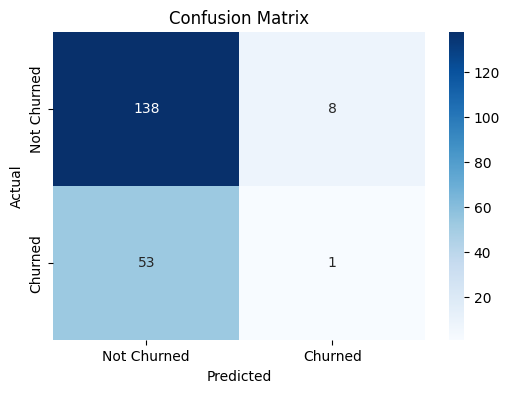

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Objective 5: Interpretation of results 

**Classification Report:**

- Precision: The precision for the churned class (1) is very low (0.11), suggesting the model struggles to accurately identify churned customers.
- Recall: The recall for the churned class (1) is also low (0.02), meaning most churned customers are missed.
- F1-Score: The F1-score for the churned class (1) is 0.03, reflecting poor overall performance in predicting churned customers.
- Overall Accuracy: 69.5%, primarily driven by the correct prediction of the non-churned class (0).

**Confusion Matrix**

- TN: True Negatives (correctly predicted as not churned)-138. This indicates the model is effective at identifying customers who are likely to stay (non-churners).
- FP: False Positives (incorrectly predicted as churned)- 8. These are "false alarms" and may indicate over-sensitivity in predicting churn.
- FN: False Negatives (incorrectly predicted as not churned)- 53. This is a critical issue, as it means the model misses most of the customers who are at risk of leaving. Failing to predict churned customers can be costly because the business misses opportunities to intervene and retain them.
- TP: True Positives (correctly predicted as churned)- 1. This indicates a severe weakness in the model's ability to detect churners.

**Conclusion:**
While the model is good at identifying loyal customers, it does not fulfill the primary goal of predicting at-risk customers.
Missing churners (FN: 53) means the business cannot take corrective actions to retain these customers, potentially leading to revenue loss